In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

import os
import warnings
warnings.filterwarnings("ignore")

# setting params
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}


sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600



np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']

In [2]:
df=pd.read_excel('online_retail.xlsx')

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df=df[df.Country=='United Kingdom']

In [6]:
df.drop('Country', axis=1, inplace=True)

In [7]:
df=df.rename(columns=lambda x:x.lower())

In [8]:
df.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     133600
dtype: int64

In [9]:
df.customerid.value_counts()

17841.0    7983
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
           ... 
17923.0       1
17925.0       1
16881.0       1
15753.0       1
17307.0       1
Name: customerid, Length: 3950, dtype: int64

In [10]:
df.stockcode.nunique()

4065

In [11]:
df.description.nunique()

4202

In [12]:
df.customerid.nunique()

3950

In [13]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid'],
      dtype='object')

In [14]:
cat_df_stock_desc= df.groupby(['stockcode','description']).count().reset_index()

In [15]:
cat_df_stock_desc.head()

stockcode                  description  invoiceno  quantity  invoicedate  \
0     10002  INFLATABLE POLITICAL GLOBE          58        58           58   
1     10080     GROOVY CACTUS INFLATABLE         22        22           22   
2     10080                        check          1         1            1   
3     10120                 DOGGY RUBBER         29        29           29   
4     10125      MINI FUNKY DESIGN TAPES         81        81           81   

   unitprice  customerid  
0         58          36  
1         22          21  
2          1           0  
3         29          29  
4         81          51

In [16]:
cat_df_stock_desc.description.value_counts()[cat_df_stock_desc.description.value_counts()>1].reset_index()

index  description
0                                check          146
1                                    ?           47
2                              damages           43
3                              damaged           43
4                                found           25
..                                 ...          ...
167                            crushed            2
168  PINK HAWAIIAN PICNIC HAMPER FOR 2            2
169            ROMANTIC PINKS RIBBONS             2
170                     RETRO MOD TRAY            2
171    S/4 PINK FLOWER CANDLES IN BOWL            2

[172 rows x 2 columns]

In [17]:
cat_df_stock_desc.stockcode.value_counts()[cat_df_stock_desc.stockcode.value_counts()>1].reset_index()

index  stockcode
0     20713          8
1     23084          7
2     85175          6
3     21830          6
4     23343          5
..      ...        ...
636   21627          2
637  84805A          2
638   23502          2
639   21992          2
640   71143          2

[641 rows x 2 columns]

In [18]:
df[df.stockcode==20713].description.value_counts()

JUMBO BAG OWLS                  633
wrongly coded-23343               1
wrongly marked. 23343 in box      1
found                             1
wrongly marked 23343              1
wrongly coded 23343               1
Found                             1
Marked as 23343                   1
Name: description, dtype: int64

In [19]:

df[df['stockcode'] == cat_df_stock_desc.stockcode.value_counts()[cat_df_stock_desc.stockcode.value_counts()>1].reset_index()
['index'][10]]['description'].unique()

array(['DINOSAUR KEYRINGS ASSORTED', 'sold as 1', '?missing',
       'adjustment'], dtype=object)

In [20]:
df.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid  
0 2010-12-01 08:26:00       2.55     17850.0  
1 2010-12-01 08:26:00       3.39     17850.0  
2 2010-12-01 08:26:00       2.75     17850.0  
3 2010-12-01 08:26:00       3.39     17850.0  
4 2010-12-01 08:26:00       3.39     17850.0

In [21]:
df[['quantity','unitprice']] .describe()

quantity      unitprice
count  495478.000000  495478.000000
mean        8.605486       4.532422
std       227.588756      99.315438
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.100000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [22]:
df[df.unitprice <0]

invoiceno stockcode      description  quantity         invoicedate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        unitprice  customerid  
299983  -11062.06         NaN  
299984  -11062.06         NaN

In [23]:
df[df.quantity <0]

invoiceno stockcode                       description  quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               invoicedate  unitprice  customerid  
141    2010-12-01 09:41:00      27.50     14527.0  
154    2010-12-01 09:49:00       4.65     15311.0  
235    2010-12-01 10:24:00       1.65     17548.0  
236    2010-12-01 10:24:00       0.29     17548.0  
237    2010-12-01 10:24:00       0.29     17548.0  
...                    ...        ...         ...  
540449 2011-12-09 09:57:00       0.83     14397.0  
541541 2011-12-09 10:28:00     224.69     15498.0  
541715 2011-12-09 11:57:00      10.95     15311.0  
541716 2011-12-09 11:58:00       1.25     17315.0  
541717 2011-12-09 11:58:00       1.25     17315.0  

[9192 rows x 7 columns]

In [24]:
df['total']=df['quantity']*df['unitprice']

In [25]:
## Data Cleaning

df=df[~(df.total<0)]


In [26]:
df=df[~(df.customerid.isnull())]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    354345 non-null  object        
 1   stockcode    354345 non-null  object        
 2   description  354345 non-null  object        
 3   quantity     354345 non-null  int64         
 4   invoicedate  354345 non-null  datetime64[ns]
 5   unitprice    354345 non-null  float64       
 6   customerid   354345 non-null  float64       
 7   total        354345 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 24.3+ MB


# Recency

In [28]:
import datetime

import math
from scipy.stats import norm

In [29]:
df.invoicedate.max()

Timestamp('2011-12-09 12:49:00')

In [30]:
#reference date
reference_date=df.invoicedate.max()

In [31]:
reference_date=reference_date +datetime.timedelta(days = 1)

In [32]:
reference_date

Timestamp('2011-12-10 12:49:00')

In [33]:
#Recency

df['days_since_last']=reference_date - df.invoicedate

In [34]:
df['days_num']=df['days_since_last'].astype('timedelta64[D]')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   invoiceno        354345 non-null  object         
 1   stockcode        354345 non-null  object         
 2   description      354345 non-null  object         
 3   quantity         354345 non-null  int64          
 4   invoicedate      354345 non-null  datetime64[ns] 
 5   unitprice        354345 non-null  float64        
 6   customerid       354345 non-null  float64        
 7   total            354345 non-null  float64        
 8   days_since_last  354345 non-null  timedelta64[ns]
 9   days_num         354345 non-null  float64        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 29.7+ MB


In [36]:
df[['customerid', 'days_num']]

customerid  days_num
0          17850.0     374.0
1          17850.0     374.0
2          17850.0     374.0
3          17850.0     374.0
4          17850.0     374.0
...            ...       ...
541889     15804.0       1.0
541890     13113.0       1.0
541891     13113.0       1.0
541892     13113.0       1.0
541893     13113.0       1.0

[354345 rows x 2 columns]

In [37]:
customer_history=df.groupby('customerid')[['days_num']].min().reset_index()
customer_history.rename(columns={'days_num':'recency'}, inplace=True)


In [38]:
customer_history

customerid  recency
0        12346.0    326.0
1        12747.0      2.0
2        12748.0      1.0
3        12749.0      4.0
4        12820.0      3.0
...          ...      ...
3916     18280.0    278.0
3917     18281.0    181.0
3918     18282.0      8.0
3919     18283.0      4.0
3920     18287.0     43.0

[3921 rows x 2 columns]

In [39]:
customer_history.recency.describe()

count    3921.000000
mean       92.188472
std        99.528995
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: recency, dtype: float64

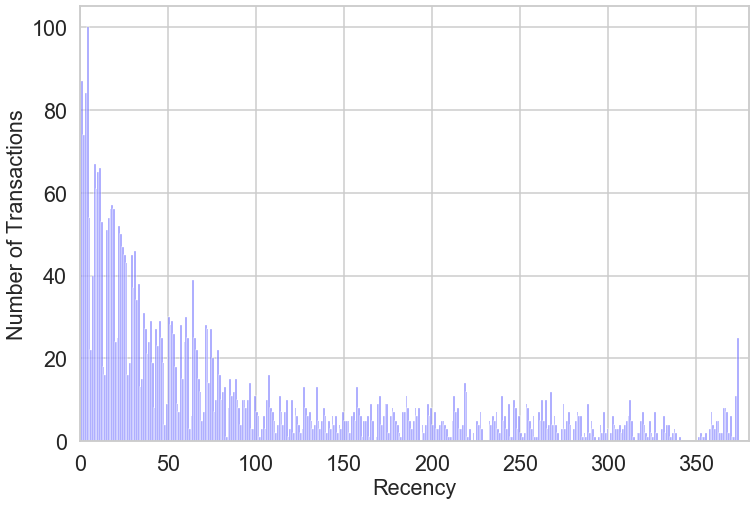

In [40]:
plt.hist(customer_history['recency'], bins=373, alpha=0.5, color='blue')
plt.xlabel('Recency')
plt.ylabel('Number of Transactions')

plt.xlim(0,380)
plt.show()

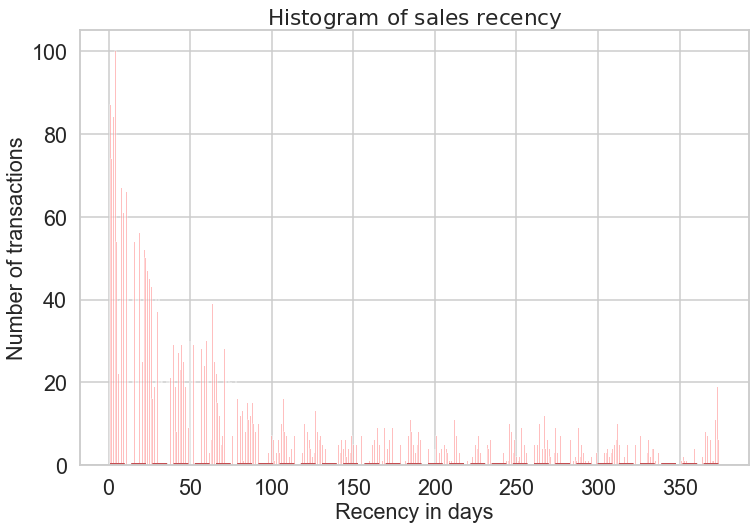

In [41]:
x=customer_history.recency
mu=np.mean(customer_history.recency)
sigma = math.sqrt(np.var(customer_history.recency))

n, bins, patches = plt.hist(x, 1000, facecolor='red', alpha=0.5)


# add a best fit line

y = norm.pdf(bins, mu, sigma)

l=plt.plot(bins, y, 'r--', linewidth=4)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')
plt.grid(True)



# Spending Per customer

In [42]:
spend_cust=df[['customerid', 'total']].groupby('customerid').sum().reset_index()

In [43]:
spend_cust

customerid     total
0        12346.0  77183.60
1        12747.0   4196.01
2        12748.0  33719.73
3        12749.0   4090.88
4        12820.0    942.34
...          ...       ...
3916     18280.0    180.60
3917     18281.0     80.82
3918     18282.0    178.05
3919     18283.0   2094.88
3920     18287.0   1837.28

[3921 rows x 2 columns]

In [44]:
customer_history=customer_history.merge(spend_cust, how='left')

In [45]:
customer_history['total'] = customer_history.total + 0.001 

In [46]:
customer_freq = df[['customerid','total']].groupby('customerid').count().reset_index()

In [47]:
customer_history.head()

customerid  recency      total
0     12346.0    326.0  77183.601
1     12747.0      2.0   4196.011
2     12748.0      1.0  33719.731
3     12749.0      4.0   4090.881
4     12820.0      3.0    942.341

In [48]:
customer_freq.head()

customerid  total
0     12346.0      1
1     12747.0    103
2     12748.0   4596
3     12749.0    199
4     12820.0     59

In [49]:
customer_freq.rename(columns={'total':'frequency'}, inplace=True)

In [50]:
customer_history= customer_history.merge(customer_freq, how='outer')

customer_history.head()

customerid  recency      total  frequency
0     12346.0    326.0  77183.601          1
1     12747.0      2.0   4196.011        103
2     12748.0      1.0  33719.731       4596
3     12749.0      4.0   4090.881        199
4     12820.0      3.0    942.341         59

In [51]:
#Log Transformation

In [52]:
customer_history['recency_log']=np.log(customer_history['recency'])
customer_history['total_log']=np.log(customer_history['total'])
customer_history['frequency_log']=np.log(customer_history['frequency'])

In [53]:
X=customer_history[['recency_log','total_log','frequency_log']].to_numpy()

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler= StandardScaler()

In [56]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
X_scaled=scaler.transform(X)

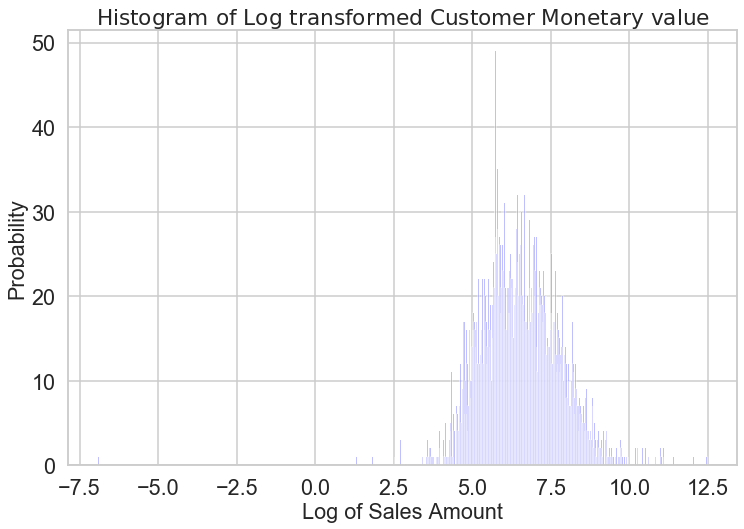

In [58]:
x=customer_history.total_log
n, bins, patches=plt.hist(x, 1000, facecolor='blue', alpha=0.5)

plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Customer\ Monetary\ value}\ $')
plt.grid(True)
plt.show()

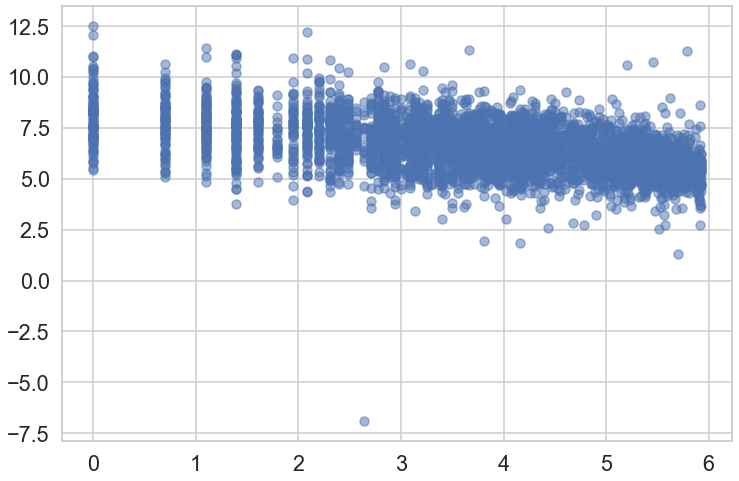

In [59]:
plt.scatter(customer_history.recency_log, customer_history.total_log, alpha=0.5)
plt.show()

In [60]:
customer_history.head()

customerid  recency      total  frequency  recency_log  total_log  \
0     12346.0    326.0  77183.601          1     5.786897  11.253942   
1     12747.0      2.0   4196.011        103     0.693147   8.341890   
2     12748.0      1.0  33719.731       4596     0.000000  10.425838   
3     12749.0      4.0   4090.881        199     1.386294   8.316516   
4     12820.0      3.0    942.341         59     1.098612   6.848367   

   frequency_log  
0       0.000000  
1       4.634729  
2       8.432942  
3       5.293305  
4       4.077537

In [61]:
from mpl_toolkits.mplot3d import Axes3D

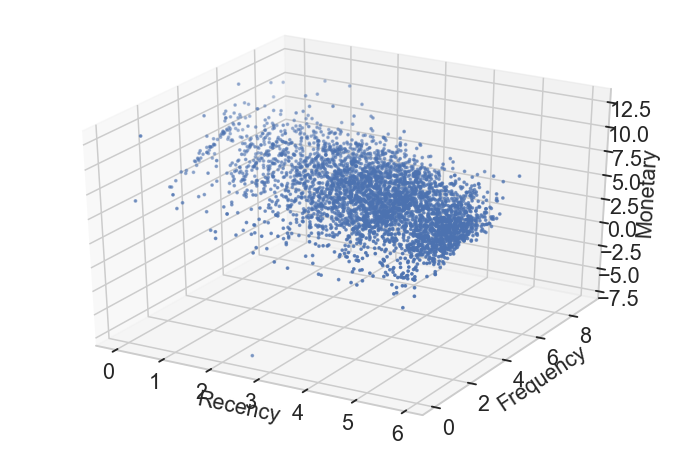

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs =customer_history.recency_log
ys = customer_history.frequency_log
zs = customer_history.total_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')


plt.show()

# # Analyze Customer Segments with Clustering

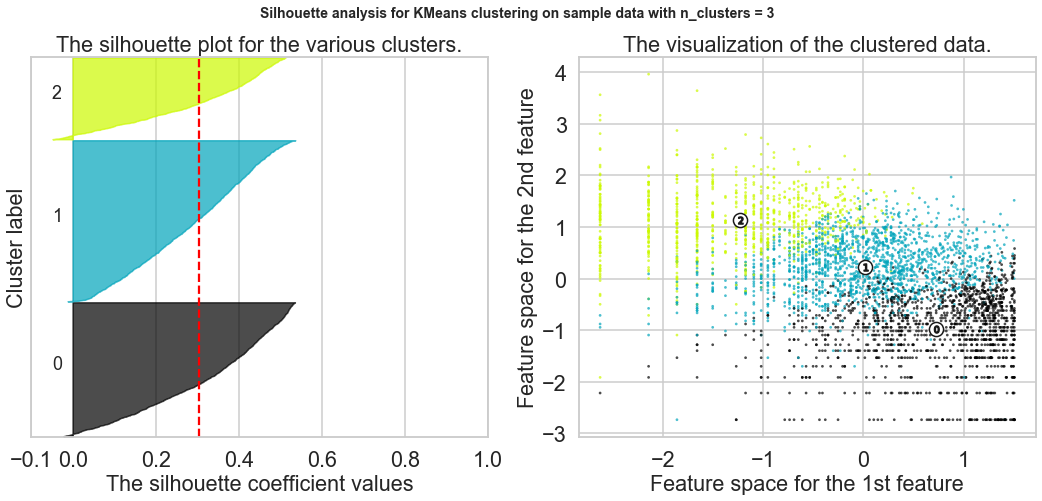

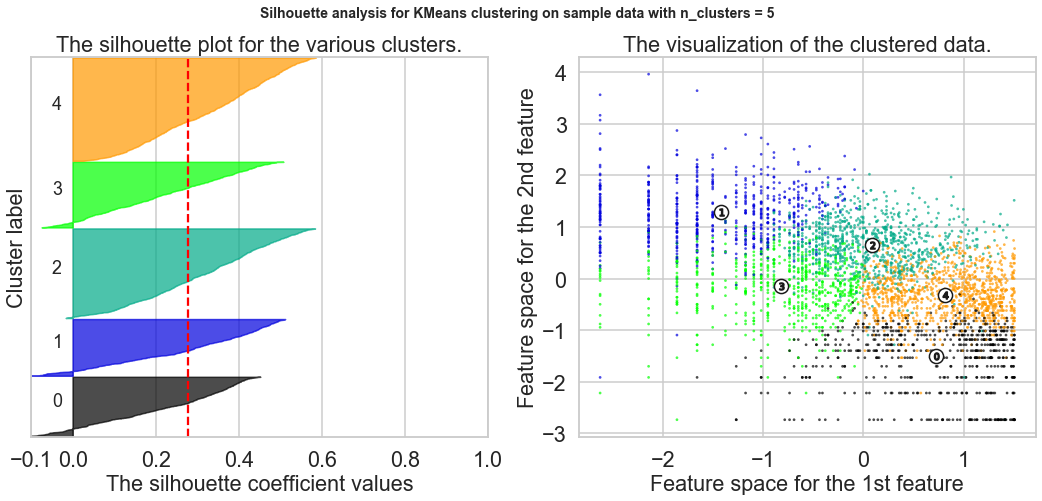

In [63]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.cm as cm

X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    #?feature1 = 0
    #??feature2 = 2
    
    ax2.scatter(X[:, 0], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [77]:
for i in range(3,6,2):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=['recency_log','total_log', 'frequency_log']))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 3 number of clusters
   recency_log    total_log  frequency_log
0   122.258999   220.198311      10.545038
1    44.343353   828.741744      53.275214
2     7.396805  3158.748880     177.087308
Silhouette score for cluster 3 is 0.30344910866275493

for 5 number of clusters
   recency_log    total_log  frequency_log
0   121.494119   144.581761       5.203414
1     5.669752  3983.000207     216.919083
2    48.475555  1529.103414      93.359920
3    13.227883   491.225157      31.937363
4   138.857191   407.421058      25.576757
Silhouette score for cluster 5 is 0.2782580724931221



In [78]:
labels = cluster_centers[5]['labels']   
customer_history['num_cluster5_labels'] = labels
labels = cluster_centers[3]['labels']
customer_history['num_cluster3_labels'] = labels

In [79]:
customer_history.head()

customerid  recency      total  frequency  recency_log  total_log  \
0     12346.0    326.0  77183.601          1     5.786897  11.253942   
1     12747.0      2.0   4196.011        103     0.693147   8.341890   
2     12748.0      1.0  33719.731       4596     0.000000  10.425838   
3     12749.0      4.0   4090.881        199     1.386294   8.316516   
4     12820.0      3.0    942.341         59     1.098612   6.848367   

   frequency_log  num_cluster5_labels  num_cluster3_labels  
0       0.000000                    2                    1  
1       4.634729                    1                    2  
2       8.432942                    1                    2  
3       5.293305                    1                    2  
4       4.077537                    3                    2

In [80]:
customer_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerid           3921 non-null   float64
 1   recency              3921 non-null   float64
 2   total                3921 non-null   float64
 3   frequency            3921 non-null   int64  
 4   recency_log          3921 non-null   float64
 5   total_log            3921 non-null   float64
 6   frequency_log        3921 non-null   float64
 7   num_cluster5_labels  3921 non-null   int32  
 8   num_cluster3_labels  3921 non-null   int32  
dtypes: float64(6), int32(2), int64(1)
memory usage: 275.7 KB


In [81]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 100
field_to_plot = 'recency'

y0 = customer_history[customer_history['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history[customer_history['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history[customer_history['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history[customer_history['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history[customer_history['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

In [69]:
x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'total'
y0 = customer_history[customer_history['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history[customer_history['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history[customer_history['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history[customer_history['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history[customer_history['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=1000,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

In [70]:
x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'frequency'
y0 = customer_history[customer_history['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history[customer_history['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history[customer_history['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history[customer_history['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history[customer_history['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=100,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

In [71]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 100
field_to_plot = 'recency'
y0 = customer_history[customer_history['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history[customer_history['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history[customer_history['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

In [72]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 80
field_to_plot = 'total'
y0 = customer_history[customer_history['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history[customer_history['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history[customer_history['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(        
        dtick=1000,
    )
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

In [73]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 90
field_to_plot = 'frequency'
y0 = customer_history[customer_history['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history[customer_history['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history[customer_history['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=100,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)